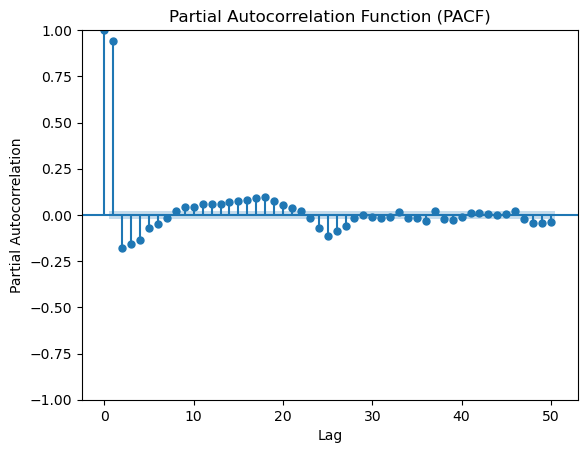

Best order based on AIC: 24
Evaluation Metrics:
MAE: 51.78106221941614
MAPE: 12.287477146292153
RMSE: 63.07649030504702


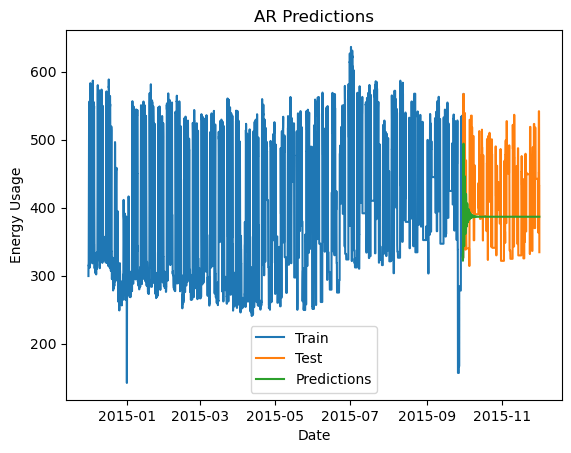

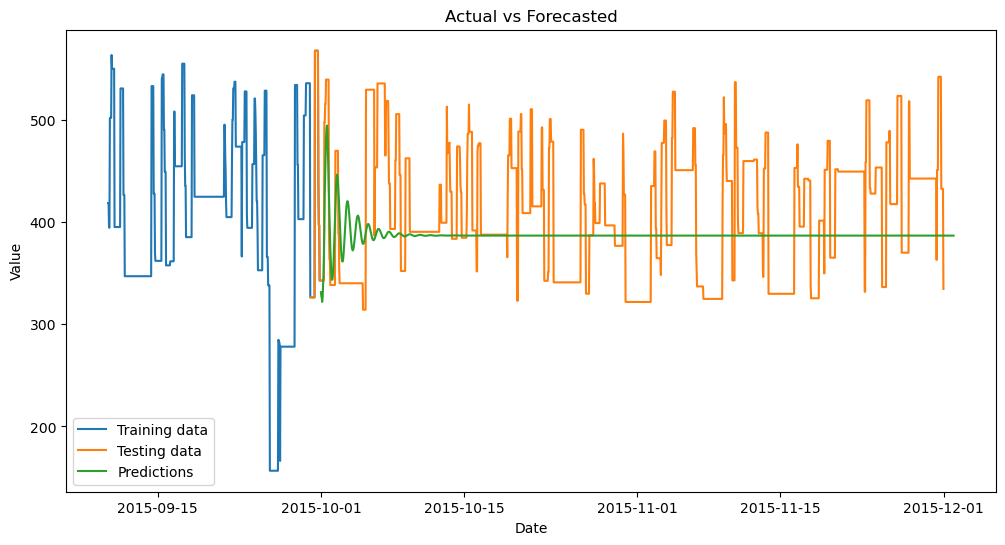

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from CSV file
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
newData = newData.drop_duplicates()
# Set the frequency to hourly
newData = newData.asfreq('H')
# Fill missing values using forward fill method
newData = newData.fillna(method='ffill')

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = newData.loc[:split_date]
test = newData.loc[split_date:]

# Plot the partial autocorrelation function (PACF)
plot_pacf(train['Office_Garman'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit different AR models with different orders and choose the best one based on AIC or BIC
order_candidates = range(1, 25)  # Try orders from 1 to 25
best_aic = np.inf
best_order = None

for order in order_candidates:
    model = AutoReg(train['Office_Garman'], lags=order)
    model_fit = model.fit()
    aic = model_fit.aic

    if aic < best_aic:
        best_aic = aic
        best_order = order

print("Best order based on AIC:", best_order)

# Fit the AR model with the best order
model = AutoReg(train['Office_Garman'], lags=best_order)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate evaluation metrics
mae = mean_absolute_error(test['Office_Garman'], predictions)
rmse = np.sqrt(mean_squared_error(test['Office_Garman'], predictions))
mape = np.mean(np.abs((test['Office_Garman'] - predictions) / test['Office_Garman'])) * 100

print("Evaluation Metrics:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

# Plot the actual data
plt.plot(train.index, train['Office_Garman'], label='Train')

# Plot the test data
plt.plot(test.index, test['Office_Garman'], label='Test')

# Plot the predictions
plt.plot(test.index, predictions, label='Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('AR Predictions')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# plotting a bit better visually, by removing part of the training data
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train.index[-500:], train[-500:], label='Training data')
ax.plot(test.index, test, label='Testing data')
ax.plot(predictions.index, predictions, label="Predictions")
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual vs Forecasted')
ax.legend()
plt.show()